In [133]:
# importing my libraries, pandas for data cleaning and slicing, plotly to graph
import pandas as pd
import plotly.express as px

# *I think it's less painstaking to read this notebook if you run the whole thing at once, rather than running each individual cell. It'll work either way, but it also avoids running some of the cells multiple times, which won't trigger an error but will change the data. 

CSE 6040 Project Requirements:
1. Commented out code
2. Visuals that are well labeled
3. Data that reads and runs without error
4. A question that is asked and answered using a data set of interest and implements an analysis
5. Relevent and substantial data less than 10 MB in size run in a single jupyter notebook file

# Socioeconomic Impact on Dialysis Resources and Access

## Topics of interest: Wealth, Kidney Disease, and Dialysis




### Introduction

For my project I chose to take a look at chronic kidney disease, specifically at dialysis quality and availability in cities with historically underserved populations and compare those to wealthier cities with an abundance of resources. I considered incidence rates across states, and prevelence of home dialysis in the U.S. as a comparison to dialysis that is provided by centers. Dialysis centers require the patient to either drive or be transported to a facility where they sit for sometimes as long as half a day and recieve dialysis (whereby blood is filtered by machine rather than by kidneys). This is common in both patients with short term dialysis needs and for patients with chronic kidney disease (CKD) or end state regnal disease (ESRD) which is the last stage of CKD after the disease has progressed past a certain point. Some cities are not public transit friendly, those who require dialysis do not always have the mobility or vehicular resources to get to a dialysis center, at which time often an ambulance is used. This is suboptimal not only because of discomfort to the patient and time wasted (sometimes most of a day when home dialysis would require no hour long transport and could be done in the comfort of their own room), but because it requires misuse of specialized transport. 

The theory I'd put forward is that the cities with the greatest wealth will have fewer and better quality dialysis resources (fewer, because in high income and high resource households, the luxury of in-home dialysis is more common) and that states with highest percentages of home dialysis will follow a similar trend.  

### Chosen Data

4 total data sets (in total under 10 MB) 

- 1st is dialysis facility data (https://data.world/health/dialysis-facility-compare-list)
- 2nd is income data by metropolitan area (https://www.bea.gov/data/income-saving/personal-income-county-metro-and-other-areas) 
- 3rd is home dialysis data by state for ESRD patients (https://usrds-adr.niddk.nih.gov/2022/reference-tables) 
- 4th is prevelence of ESRD by state (https://www.niddk.nih.gov/about-niddk/strategic-plans-reports/usrds/data-query-tools/esrd-prevalent-count)


### To Impute or Delete: Dealing with Missing Data

* Note: I have a lot of try and except error handling written into the code below -- this is mostly to avoid confusion if someone runs some of these cells multiple times (i.e you can't delete something you've already deleted). I don't know why you'd want to, but I don't want the notebook to throw errors after repeat runs. They don't really serve a functional purpose outside of just being overcautious. 

Missing data needs to be dealt with on a case by case basis for these data sets, however there were some commonalities. For example in the dialysis facility data, most of the missing NA rows appear in the second line of the address, which isn't information we need anyhow -- I'm not necessarily interested in the exact street (although that would be an interesting more granular approach one could take in future) but rather cities and states that I have other data for as well. So it makes sense for me to first pull only columns I care about from all 4 data sets, as that removes many of the problems I'd otherwise face, then eventually merge them.

Data Set 1: The data set includes a category for whether data is present or missing, which would make for easier imputation, however with over 6000 entries I chose not to add possible error with linear regression or averages to replace missing rows, and instead deleted any which didn't include a five star rating or information on the patient survival ratio. 

Data Set 2: This was the most problematic data set in that it had a great deal of missing data, presumably because it's much harder to track patients who are not recieving care post diagnosis within a larger clinical system and perform their own care at home, or pay private parties to aid in home care. Also, rather than having NA, most missing data is denoted with an asterisk. Deleting data would greatly limit my analysis by removing entire states, however that is what I opted to do, because the data available is what it is -- there isn't enough detail in this set to impute, and it would be a terrible idea to use medians or averages to replace missing data given the intended goal of my project. So if there was no data for home or center dialysis, I deleted the row -- I removed other rows, even though they added something interesting to the analysis, to avoid having to remove even more states from the set. 

Data Set 3: Missing data had mosty to do with rank, and didn't make sense for some of the rows included (i.e. they included a set of data for the whole U.S., so couldn't give it a rank since it wasn't an international data set. So I just removed those rows as we aren't interested in anything but state or city level anyways. 

Data Set 4: The last data set came pre-cleaned, which was great. 


### Cleaning & Calculating

Data provided from each data set don't all come from within the same time frame. This is a major pitfall, and unfortunately while the data can be currated to a degree, dailysis facility data is older (most recently updated in 2014 based on the dates provided for star ratings). I chose to use income data from 2020 so as to retain as much overlap with prevelence data as possible -- not considering 2019 or 2021 because there was already a column for trends in income, so I didn't need to manually calculate any changes from previous or more recent years. However ranking was only available for 2021. 

Other steps taken to clean data for easy comparison:  
1.  Renaming all columns to a consistent schema
2.  Any data sets that listed city and state in one column were split into two separate columns
3.  Columns used to confirm correct handling of missing data now removed 
4.  Across data frames, some states were written as "Michigan" and others as "MI" so I used a dictionary I created from a csv list of abbreviations to parse through and make all data sets utilize the abbreviated state name.  

I added a column to see percentage of home dialysis treatments found in each state out of the total. I also wanted the totals for each state's income, so created another column in "Income" that showed that by summing through each city and then merging it as another dataframe. I also wanted a mean of star ratings for facilities, and since outcomes are written as categories, I chose to convert them to numeric ratings and then add a column to give mean outcome for each facility (i.e. better than expected is 3, worse than expected is 1, and same as expected is 2) using a lambda function. 

### Combining
Now that everything was in a good format for merging, I merged Facilities and Income on city name, and I merged home dialysis with end stage renal disease prevelence on state. I then did another merge on home dialysis and prevelence with just the column from "Income" I'd created to look at total income by state.  

### Visuals 
I have the code for producing these below, but I'm pasting them here for easier perusal.   

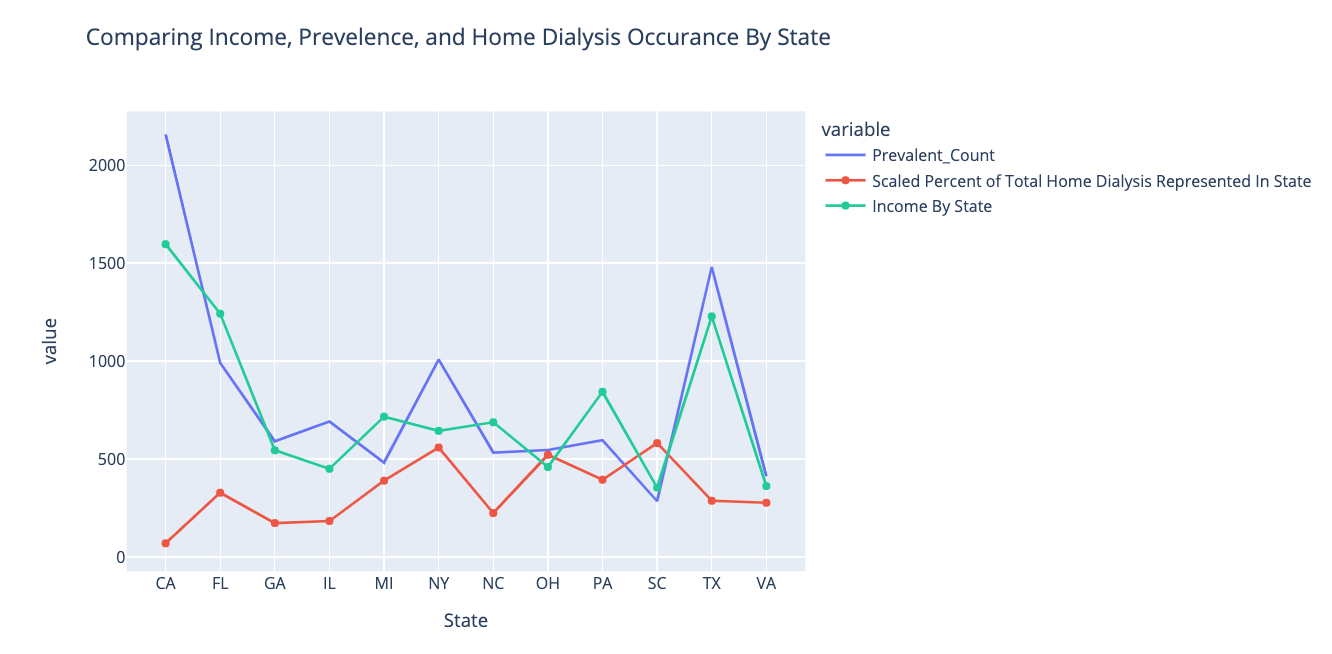

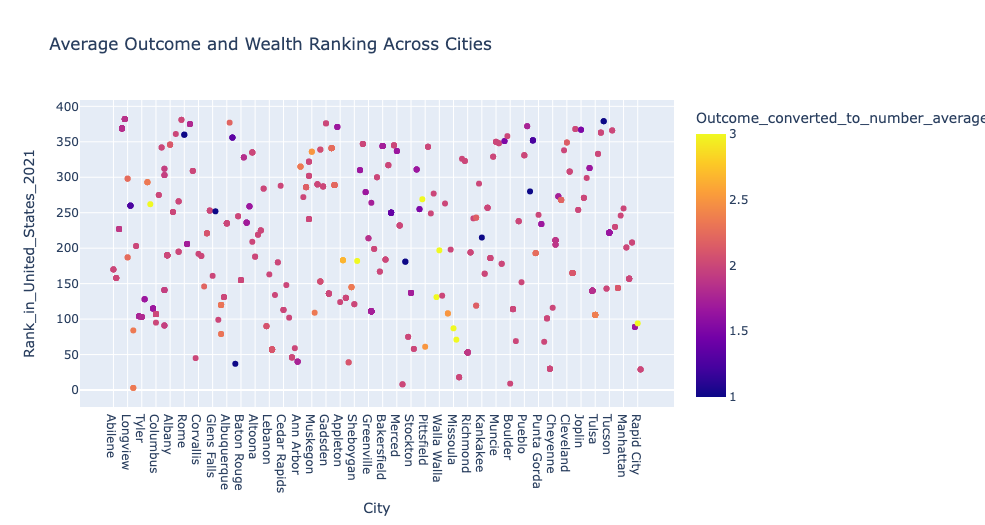

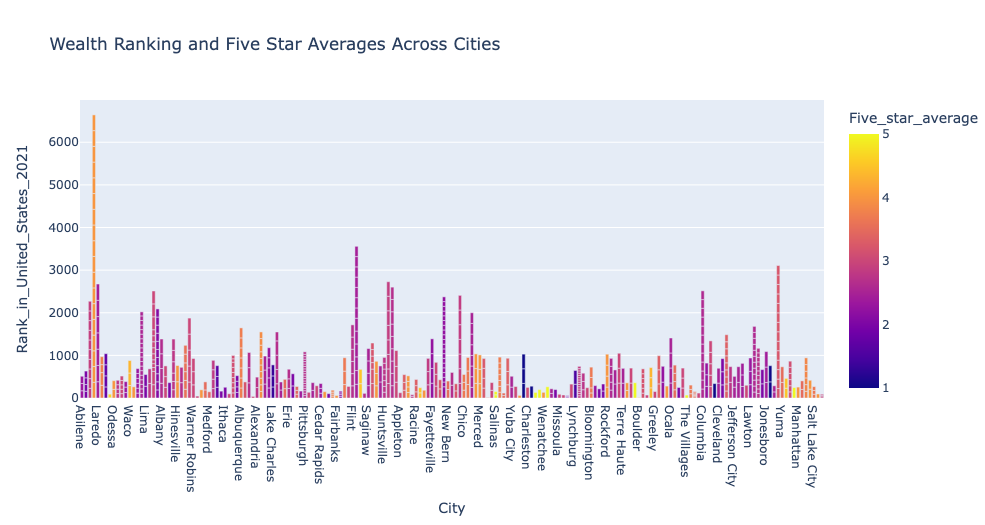

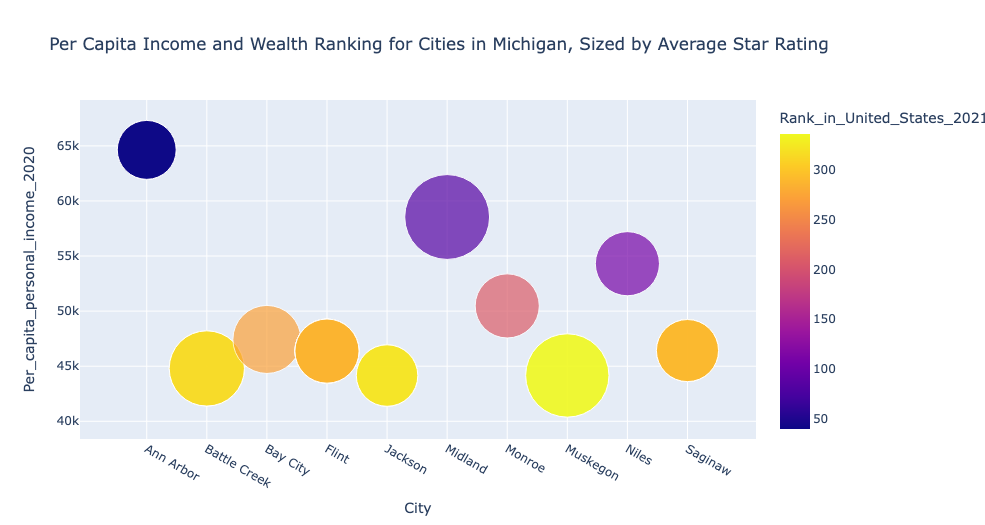

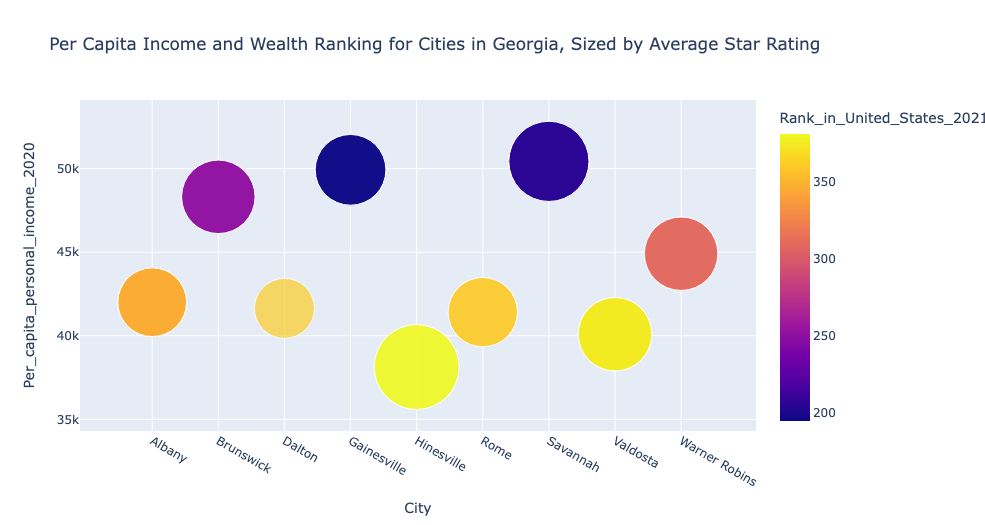

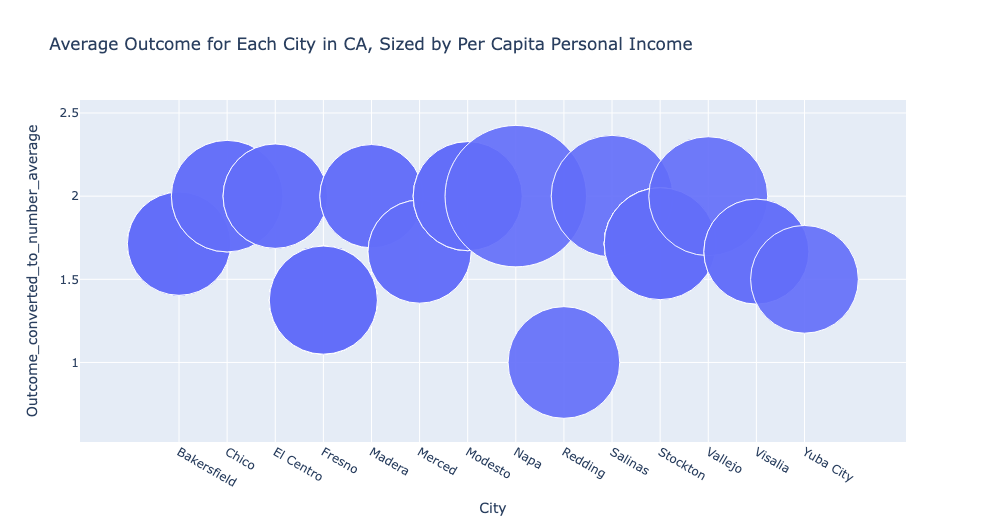

### Conclusion

It's really not safe to say based on the limited data that there is a strong pattern or connection in care quality or opportunity, and I also don't think it's safe to rule it out. I was hoping for some very obvious parallels, but those aren't really present in a significant way, and in ways, that makes sense. 

Star averages don't necessarily speak to the quality of care -- only to quality in terms of patient experience. Similar things can be said of patient outcomes, which are dependent on a lot of things, including other health effects in the area. With the data provided, I think perhaps scaling could have helped with some of the visual aspects -- I did some scaling to making different metric comperable, but there just wasn't enough spread to be visually appealing for a lot of the categories. 

### Further Considerations

It would have been preferable to use data for incidence and home dialysis at the city level however it was difficult to find resoureces that went into such granular detail, possibly due to HIPAA (Health Insurance Portability and Accountability Act). Some research sources differentiate between End State Renal Disease (ESRD) and Chronic Kidney Disease (CKD) which I tried to pair my data sets appropriately by, however some do not, which could be a source of error. 


# Code Below: 
#### Titles above each cell explain what it does as a whole and what to expect for displayed output. Comments inside each cell go into more detail for each line of code. 

##### Run cell below to display initial data sets:

In [134]:
#Reading the CSVs required for this analysis and display them below, uncleaned or changed:
print("\033[1m" + "Comparing Dialysis Facilities:" + "\033[0m")
Dialysis = pd.read_csv('Dialysis_Facility_Compare_-_Listing_by_Facility.csv')
display(Dialysis.head(5))
#Dialysis.loc[Dialysis.State == 'MI']

print("\033[1m" + "Home Treatment Prevelence" + "\033[0m")
Home_Dialysis = pd.read_csv("Incident ESRD patients_ 2020_ by modality and state_territory.csv", header = 0)
display(Home_Dialysis.head(5))

print("\033[1m" + "Income Data By Metropolitan Area" + "\033[0m")
Income = pd.read_csv("Income_By_Metropolitan_Area.csv")
display(Income.head(5))

print("\033[1m" + "How Common End State Renal Disease Is By State" + "\033[0m")
Prevalence = pd.read_csv("Prevalent_ESRD_Count_by_State.csv")
display(Prevalence.head(5))


Comparing Dialysis Facilities:


,Provider number,Network,Facility name,Five star date,Five star,Five star data availability code,Address line 1,Address line 2,City,State,...,Rate of hospital readmission data availability code,Patient survival category text,Patient survival data availability code,Number of patients included in hospitalization summary,Number of hospitalizations included in hospital readmission (facility),Number of patients included in survival summary,Standardized hospitalization ratio,Standardized readmission ratio,Standardized mortality ratio,Location
0,032518,15,FOUR CORNERS DIALYSIS CLINIC CHINLE (DVA),01/01/2011-12/31/2014,4.0,1,US HWY 191,NaN,CHINLE,AZ,...,1,Better than Expected,1,96.0,88.0,421.0,0.55,0.49,0.42,"US HWY 191\nCHINLE, AZ 86503\n"
1,032598,15,MAMMOTH DIALYSIS (FMC),01/01/2011-12/31/2014,4.0,1,14786 S HIGHWAY 77 - POB 729,NaN,MAMMOTH,AZ,...,1,As Expected,1,22.0,25.0,125.0,1.07,0.48,0.90,"14786 S HIGHWAY 77 - POB 729\nMAMMOTH, AZ 85618\n"
2,050138,18,KAISER FOUNDATION HOSPITAL MEDICAL CTR.- SUNSET,01/01/2011-12/31/2014,NaN,260,"DIALYSIS UNIT 4700 SUNSET BLVD., 2ND FLOOR",NaN,LOS ANGELES,CA,...,1,As Expected,1,94.0,128.0,970.0,3.02,0.72,0.83,"DIALYSIS UNIT 4700 SUNSET BLVD., 2ND FLOOR\nLO..."
3,052503,18,DAVITA-MAIN PLACE DIALYSIS CENTER,01/01/2011-12/31/2014,4.0,1,972 TOWN & COUNTRY ROAD,NaN,ORANGE,CA,...,1,As Expected,1,113.0,114.0,643.0,0.94,0.86,0.78,"972 TOWN &amp; COUNTRY ROAD\nORANGE, CA 92868\n"
4,052583,17,MONTEREY PENINSULA DIALYSIS,01/01/2011-12/31/2014,3.0,1,2066 NORTH FREMONT BLVD,NaN,MONTEREY,CA,...,1,As Expected,1,97.0,91.0,492.0,0.63,0.79,0.82,"2066 NORTH FREMONT BLVD\nMONTEREY, CA 93940\n"


Home Treatment Prevelence


,Unnamed: 0,Center hemodialysis,Center self hemodialysis,Home hemodialysis,CAPD,CCPD,Other PD,Uncertain dialysis,Transplant,All
0,All,"108,170",937,439,"6,506","10,002",20,469,"3,979","130,522"
1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,"1,990",14,*,64,271,*,*,48,"2,397"
3,Alaska,110,,,*,33,,,*,151
4,Arizona,"2,308",*,*,77,276,*,17,73,"2,759"


Income Data By Metropolitan Area


,Unnamed: 0,Per_capita_personal_income_ 2019,Per_capita_personal_income_ 2020,Per_capita_personal_income_ 2021,Rank in United States 2021,Percent change,Unnamed: 6,Rank in United States 2021.1
0,United States,"56,250","59,765","64,143",--,6.2,7.3,--
1,Metropolitan portion,"58,347","61,866","66,392",--,6.0,7.3,--
2,Nonmetropolitan portion,"43,075","46,495","49,962",--,7.9,7.5,--
3,"Abilene, TX","45,676","49,210","55,556",170,7.7,12.9,2
4,"Akron, OH","51,827","55,232","58,735",115,6.6,6.3,244


How Common End State Renal Disease Is By State


,State,Prevalent Count
0,Alabama,"27,588"
1,Alaska,"2,102"
2,American Samoa,127
3,Arizona,"33,636"
4,Arkansas,"13,649"


##### Run cell below to deal with missing data and select columns, then display data sets

In [135]:
#Cleaning up my missing data by removing some columns, and removing rows with missing data about 
#facility rating and surival ratio

#Set 1 Clean:
try:
    Dialysis= Dialysis[["Facility name", 'Five star', 'Five star data availability code', 'City', 'State', 'Patient survival category text', 'Patient survival data availability code', 'Standardized mortality ratio']]
    Dialysis= Dialysis.rename(columns={"Facility name": "Facility_name", 'Five star': "Five_star", 'Five star data availability code': "Five_star_data_availability_code",'Patient survival category text': "Patient_survival_cat", 'Patient survival data availability code': "Patient_survival_data_availability_code", 'Standardized mortality ratio': "Standardized_mortality_ratio"})
except:
    a = "already changed"
Dialysis = Dialysis.dropna()

#Display
print("\033[1m" + "Comparing Dialysis Facilities:" + "\033[0m")
display(Dialysis.head(5))

#Set 2 Clean: 
#renaming and selecting columns of interest
try: 
    Home_Dialysis= Home_Dialysis[["Unnamed: 0", "Center hemodialysis", "Home hemodialysis", "All"]] 
    Home_Dialysis = Home_Dialysis.rename(columns={"Unnamed: 0":"State", "Center hemodialysis": "Center_hemodialysis", "Home hemodialysis": "Home_hemodialysis"})
except:
    a = "already cleaned"
#removing empty rows or rows with other markers to denote they don't have data
for index, row in Home_Dialysis.iterrows():
    if Home_Dialysis.Home_hemodialysis[index] == "*" or Home_Dialysis.Home_hemodialysis[index] == " ":
        Home_Dialysis.drop([index], axis=0, inplace=True)
#resetting the index and removing a couple of empty rows manually
try:
    Home_Dialysis.reset_index(inplace=True)  
except:
    a = "already did that"
Home_Dialysis.drop("index", inplace=True, axis=1)
try:
    Home_Dialysis.drop("level_0", inplace=True, axis=1)
except:
    a = "didn't add two indexes by accident"
try:
    Home_Dialysis.drop(1, inplace=True, axis=0)
    Home_Dialysis.drop(14, inplace=True, axis=0)
except:
    a = "Can't delete something twice"

#Display   
print("\033[1m" + "Home Treatment Prevelence" + "\033[0m")
display(Home_Dialysis.head(5))

#Set 3 Clean:
try: 
    Income.drop(0, inplace=True, axis=0)
    Income.drop(1, inplace=True, axis=0)
    Income.drop(2, inplace=True, axis=0)
    Income.drop(387, inplace=True, axis=0)
    Income.drop(388, inplace=True, axis=0)
except:
    a = "Already fixed"
    
#check to see if any Na's, but there aren't any so this data frame is empty if you print it
df1 = Income[Income.isna().any(axis=1)]

try:
    Income= Income[["Unnamed: 0", "Per_capita_personal_income_ 2020", "Rank in United States 2021", "Percent change"]] 
    Income = Income.rename(columns={"Unnamed: 0":"City_and_State", "Per_capita_personal_income_ 2020": "Per_capita_personal_income_2020", "Rank in United States 2021": "Rank_in_United_States_2021", "Percent change": "Percent_change"})
except:
    a = "don't need to name twice"

#Display 
print("\033[1m" + "Income Data By Metropolitan Area" + "\033[0m")
display(Income.head(5))


#Set 4 Clean:
#No missing values, just code to check it 
#check for any NA's, none are present
df2 = Prevalence[Prevalence.isna().any(axis=1)]
#changed one column name
Prevalence = Prevalence.rename(columns={"Prevalent Count":"Prevalent_Count"})
try:
    Prevalence.drop(11, inplace=True, axis=0)
    Prevalence.drop(38, inplace=True, axis=0)
except:
    a = "already did it"
print("\033[1m" + "How Common End State Renal Disease Is By State" + "\033[0m")
display(Prevalence.head(5))


Comparing Dialysis Facilities:


,Facility_name,Five_star,Five_star_data_availability_code,City,State,Patient_survival_cat,Patient_survival_data_availability_code,Standardized_mortality_ratio
0,FOUR CORNERS DIALYSIS CLINIC CHINLE (DVA),4.0,1,CHINLE,AZ,Better than Expected,1,0.42
1,MAMMOTH DIALYSIS (FMC),4.0,1,MAMMOTH,AZ,As Expected,1,0.90
3,DAVITA-MAIN PLACE DIALYSIS CENTER,4.0,1,ORANGE,CA,As Expected,1,0.78
4,MONTEREY PENINSULA DIALYSIS,3.0,1,MONTEREY,CA,As Expected,1,0.82
5,KAISER FOUNDATION HOSPITAL MEDICAL CTR.- DOWNEY,3.0,1,DOWNEY,CA,As Expected,1,0.75


Home Treatment Prevelence


,State,Center_hemodialysis,Home_hemodialysis,All
0,All,"108,170",439,"130,522"
2,California,"13,058",16,"16,127"
3,Florida,"7,350",41,"8,754"
4,Georgia,"4,023",12,"4,860"
5,Illinois,"4,386",14,"5,343"


Income Data By Metropolitan Area


,City_and_State,Per_capita_personal_income_2020,Rank_in_United_States_2021,Percent_change
3,"Abilene, TX","49,210",170,7.7
4,"Akron, OH","55,232",115,6.6
5,"Albany, GA","42,006",346,10.2
6,"Albany-Lebanon, OR","48,357",226,8.7
7,"Albany-Schenectady-Troy, NY","63,951",44,7.5


How Common End State Renal Disease Is By State


,State,Prevalent_Count
0,Alabama,"27,588"
1,Alaska,"2,102"
2,American Samoa,127
3,Arizona,"33,636"
4,Arkansas,"13,649"


##### Run each cell below to clean and perform calculations on individual data sets and see the before and after

In [136]:
#read csv with conversions from State to State Abbreviations
Abbrev = pd.read_csv('abbr_name.csv', names = ["Abrev", "State"])
#display(Abbrev.head(5)) 
abbreviation_dictionary = {}
#turn into a dictionary
for index, row in Abbrev.iterrows():
    abbreviation_dictionary[row["State"]] = row["Abrev"]
#print(abbreviation_dictionary)

#source for abbreviations (plus some I added because it wasn't comprehensive)
#https://worldpopulationreview.com/states/state-abbreviations

In [137]:
#Clean and calculate for data set 1
#remove extra columns not needed for missing data anymore
print("\033[1m" + "Before:" + "\033[0m")
display(Dialysis.head(5))

try:
    Dialysis= Dialysis[["Facility_name", 'Five_star', 'City', 'State', 'Patient_survival_cat', 'Standardized_mortality_ratio']]
except:
    a = "done"

#make city lowercase except for first letter
Dialysis['City'] = Dialysis['City'].str.title()
 
    
#patient survival category by city 
def convert(x):
    if x == "Better than Expected":
        return 3
    elif x == "As Expected":
        return 2
    else:
        return 1

Dialysis['Outcome_converted_to_number'] = Dialysis.Patient_survival_cat.apply(lambda x: convert(x))


#add an average five star rating and average of converted number
NewDF = Dialysis.groupby(['City']).mean()
NewDF = NewDF.drop("Standardized_mortality_ratio", axis= 1)
Dialysis = pd.merge(Dialysis, NewDF, on=["City"])

#rename new merged columns

try:
    Dialysis = Dialysis.rename(columns={"Five_star_y":"Five_star_average", "Outcome_converted_to_number_y": "Outcome_converted_to_number_average", "Outcome_converted_to_number_x": "Outcome_converted_to_number", "Five_star_x": "Five_star"})
except:
    a = "don't need to name twice"




#print(NewDF2)
print("\033[1m" + "After:" + "\033[0m")
display(Dialysis.head(5))
#Dialysis.loc[Dialysis.State == 'MI']


Before:


,Facility_name,Five_star,Five_star_data_availability_code,City,State,Patient_survival_cat,Patient_survival_data_availability_code,Standardized_mortality_ratio
0,FOUR CORNERS DIALYSIS CLINIC CHINLE (DVA),4.0,1,CHINLE,AZ,Better than Expected,1,0.42
1,MAMMOTH DIALYSIS (FMC),4.0,1,MAMMOTH,AZ,As Expected,1,0.90
3,DAVITA-MAIN PLACE DIALYSIS CENTER,4.0,1,ORANGE,CA,As Expected,1,0.78
4,MONTEREY PENINSULA DIALYSIS,3.0,1,MONTEREY,CA,As Expected,1,0.82
5,KAISER FOUNDATION HOSPITAL MEDICAL CTR.- DOWNEY,3.0,1,DOWNEY,CA,As Expected,1,0.75


After:


,Facility_name,Five_star,City,State,Patient_survival_cat,Standardized_mortality_ratio,Outcome_converted_to_number,Five_star_average,Outcome_converted_to_number_average
0,FOUR CORNERS DIALYSIS CLINIC CHINLE (DVA),4.0,Chinle,AZ,Better than Expected,0.42,3,4.000000,3.000000
1,MAMMOTH DIALYSIS (FMC),4.0,Mammoth,AZ,As Expected,0.90,2,4.000000,2.000000
2,DAVITA-MAIN PLACE DIALYSIS CENTER,4.0,Orange,CA,As Expected,0.78,2,3.555556,2.222222
3,ST. JOSEPH HOSPITAL RENAL CENTER,3.0,Orange,CA,Better than Expected,0.74,3,3.555556,2.222222
4,BIOTRONICS KIDNEY CENTER OF ORANGE,2.0,Orange,TX,As Expected,0.86,2,3.555556,2.222222


In [138]:
print("\033[1m" + "Before" + "\033[0m")
display(Home_Dialysis.head(5))

#Clean and calculate for data set 2
#drop unnecessary row with totals that no longer work now that missing data removed
try: 
    Home_Dialysis.drop(0, inplace=True, axis=0)
except:
    a = "Already fixed"
    
#change states to abbreviations
for index, row in Home_Dialysis.iterrows():
    state = str(row["State"])
    abrev = abbreviation_dictionary[state]
    row["State"] = abrev

#Convert numbers from strings to floats and remove commas
try:
    Home_Dialysis['Home_hemodialysis'] = Home_Dialysis['Home_hemodialysis'].str.replace(',','')
    Home_Dialysis['All'] = Home_Dialysis['All'].str.replace(',','')
    Home_Dialysis['Center_hemodialysis'] = Home_Dialysis['Center_hemodialysis'].str.replace(',','')
except:
    a = "already converted"
Home_Dialysis['Home_hemodialysis'] = pd.to_numeric(Home_Dialysis['Home_hemodialysis']) 
Home_Dialysis['Center_hemodialysis'] = pd.to_numeric(Home_Dialysis['Center_hemodialysis']) 
Home_Dialysis['All'] = pd.to_numeric(Home_Dialysis['All'])

#add column with calculated percentage of total dialysis done at home
Home_Dialysis['Percent_Home_Dialysis_By_State'] = (Home_Dialysis['Home_hemodialysis']/Home_Dialysis['All']) *100

#Display
print("\033[1m" + "After" + "\033[0m")
display(Home_Dialysis.head(5))

Before


,State,Center_hemodialysis,Home_hemodialysis,All
0,All,"108,170",439,"130,522"
2,California,"13,058",16,"16,127"
3,Florida,"7,350",41,"8,754"
4,Georgia,"4,023",12,"4,860"
5,Illinois,"4,386",14,"5,343"


After


,State,Center_hemodialysis,Home_hemodialysis,All,Percent_Home_Dialysis_By_State
2,CA,13058,16,16127,0.099213
3,FL,7350,41,8754,0.468357
4,GA,4023,12,4860,0.246914
5,IL,4386,14,5343,0.262025
6,MI,3328,22,3955,0.556258


In [139]:
#Clean and calculate for data set 3
print("\033[1m" + "Before" + "\033[0m")
display(Income.head(5))

try:
#Split City and State into two columns
    Income[['City', "State"]] = Income["City_and_State"].str.split(',', expand=True)

#Delete the extra column
    Income.drop("City_and_State", inplace=True, axis=1)
#Get rid of commas and change to numeric
    Income['Per_capita_personal_income_2020'] = Income['Per_capita_personal_income_2020'].str.replace(',','')
    Income['Per_capita_personal_income_2020'] = pd.to_numeric(Income['Per_capita_personal_income_2020']) 
    Income['Rank_in_United_States_2021'] = pd.to_numeric(Income['Rank_in_United_States_2021']) 
    Income['Percent_change'] = pd.to_numeric(Income['Percent_change']) 
    Income['State'] = Income.State.str.strip()
except:
    a = 'already done'


#Create another column that just shows total income per state
set_states = set(Income["State"])
dict_states = {i:0 for i in set_states}
for index, row in Income.iterrows():
    dict_states[row["State"]] = dict_states[row["State"]] + row['Per_capita_personal_income_2020']

st = list(dict_states.keys())
tot = my_list = list(dict_states.values())
combo = {"State": st, "Total_Income": tot}

Total_By_State = pd.DataFrame(combo)
#display(Total_By_State)

#merge that column with original dataframe
Income = pd.merge(Income, Total_By_State, on=["State"])


print("\033[1m" + "After" + "\033[0m")
display(Income.head(5))

Before


,City_and_State,Per_capita_personal_income_2020,Rank_in_United_States_2021,Percent_change
3,"Abilene, TX","49,210",170,7.7
4,"Akron, OH","55,232",115,6.6
5,"Albany, GA","42,006",346,10.2
6,"Albany-Lebanon, OR","48,357",226,8.7
7,"Albany-Schenectady-Troy, NY","63,951",44,7.5


After


,Per_capita_personal_income_2020,Rank_in_United_States_2021,Percent_change,City,State,Total_Income
0,49210,170,7.7,Abilene,TX,1228155
1,52617,158,7.1,Amarillo,TX,1228155
2,64916,31,2.3,Austin-Round Rock-Georgetown,TX,1228155
3,46711,296,4.2,Beaumont-Port Arthur,TX,1228155
4,34040,383,12.1,Brownsville-Harlingen,TX,1228155


In [140]:
#Clean and calculate for data set 4
print("\033[1m" + "Before" + "\033[0m")
display(Prevalence.head(5))

#drop column that doesn't have a good match:
Prevalence.drop(2, inplace=True, axis=0)
Prevalence.drop(9, inplace=True, axis=0)
Prevalence.drop(13, inplace=True, axis=0)


#Change states to abbreviations and make numeric
try:
    for index, row in Prevalence.iterrows():
        state = str(row["State"])
        abrev =abbreviation_dictionary[state]
        row["State"] = abrev 
except:
    a = "already done"

try: 
    Prevalence['Prevalent_Count'] = Prevalence['Prevalent_Count'].str.replace(',','')
    Prevalence['Prevalent_Count'] = pd.to_numeric(Prevalence['Prevalent_Count'])
except:
    a = "already done"
print("\033[1m" + "After" + "\033[0m")
display(Prevalence.head(5))

Before


,State,Prevalent_Count
0,Alabama,"27,588"
1,Alaska,"2,102"
2,American Samoa,127
3,Arizona,"33,636"
4,Arkansas,"13,649"


After


,State,Prevalent_Count
0,AL,27588
1,AK,2102
3,AZ,33636
4,AR,13649
5,CA,215759


##### Combine Data Frames

In [141]:
inner_merge_dialysis_income = pd.merge(Income, Dialysis, on=["City", "State"])
display(inner_merge_dialysis_income)

,Per_capita_personal_income_2020,Rank_in_United_States_2021,Percent_change,City,State,Total_Income,Facility_name,Five_star,Patient_survival_cat,Standardized_mortality_ratio,Outcome_converted_to_number,Five_star_average,Outcome_converted_to_number_average
0,49210,170,7.7,Abilene,TX,1228155,FRESENIUS MEDICAL CARE ABILENE,2.0,As Expected,1.02,2,2.333333,2.000000
1,49210,170,7.7,Abilene,TX,1228155,FMC DIALYSIS SERVICES OF ABILENE SOUTH,2.0,As Expected,1.05,2,2.333333,2.000000
2,49210,170,7.7,Abilene,TX,1228155,FRESENIUS MEDICAL CARE ABILENE LONE STAR,3.0,As Expected,1.08,2,2.333333,2.000000
3,52617,158,7.1,Amarillo,TX,1228155,FRESENIUS MEDICAL CARE AMARILLO HIGH PLAINS,2.0,As Expected,1.13,2,2.000000,2.000000
4,52617,158,7.1,Amarillo,TX,1228155,US RENAL CARE AMARILLO DIALYSIS,1.0,As Expected,1.35,2,2.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,57114,89,8.5,Salt Lake City,UT,197980,UTAH DIALYSIS LAB,5.0,As Expected,0.82,2,3.666667,1.666667
675,58442,94,8.1,Rapid City,SD,126131,REGIONAL DIALYSIS CENTER,4.0,Better than Expected,0.55,3,4.000000,3.000000
676,67689,29,6.3,Sioux Falls,SD,126131,SANFORD HEALTH - DIALYSIS UNIT,3.0,As Expected,1.00,2,3.000000,2.000000
677,67689,29,6.3,Sioux Falls,SD,126131,SIOUX FALLS DIALYSIS - DAVITA,3.0,As Expected,1.12,2,3.000000,2.000000


In [142]:
inner_merge_home_dialysis_prevalence = pd.merge(Home_Dialysis, Prevalence, on=["State"])
inner_merge_home_dialysis_prevalence_income = pd.merge(inner_merge_home_dialysis_prevalence, Income, on=["State"])
inner_merge_home_dialysis_prevalence_income = inner_merge_home_dialysis_prevalence_income[["State","Center_hemodialysis","Home_hemodialysis","All","Percent_Home_Dialysis_By_State","Prevalent_Count", "Total_Income"]]
inner_merge_home_dialysis_prevalence_income = inner_merge_home_dialysis_prevalence_income.drop_duplicates()
display(inner_merge_home_dialysis_prevalence_income)                                       
                                                                                           

,State,Center_hemodialysis,Home_hemodialysis,All,Percent_Home_Dialysis_By_State,Prevalent_Count,Total_Income
0,CA,13058,16,16127,0.099213,215759,1596856
26,FL,7350,41,8754,0.468357,99011,1241751
48,GA,4023,12,4860,0.246914,59001,544582
60,IL,4386,14,5343,0.262025,69113,449793
69,MI,3328,22,3955,0.556258,48123,716245
83,NY,6654,61,7645,0.797907,100782,643792
95,NC,3710,14,4374,0.320073,53312,687425
109,OH,4187,38,5098,0.745390,54576,458812
118,PA,4086,27,4795,0.563087,59589,843129
134,SC,1986,20,2409,0.830220,28539,354073


##### Visualization

In [143]:
#scaling data to graph easier
inner_merge_home_dialysis_prevalence_income_adjusted = inner_merge_home_dialysis_prevalence_income
inner_merge_home_dialysis_prevalence_income_adjusted['Percent_Home_Dialysis_By_State'] = inner_merge_home_dialysis_prevalence_income_adjusted['Percent_Home_Dialysis_By_State'] *700
inner_merge_home_dialysis_prevalence_income_adjusted['Total_Income'] = inner_merge_home_dialysis_prevalence_income_adjusted['Total_Income'] /1000
inner_merge_home_dialysis_prevalence_income_adjusted['Prevalent_Count'] = inner_merge_home_dialysis_prevalence_income_adjusted['Prevalent_Count']/100



In [144]:

fig1 = px.line(inner_merge_home_dialysis_prevalence_income_adjusted, x='State', y="Prevalent_Count", title='Comparing Income, Prevelence, and Home Dialysis Occurance By State')

fig1.add_scatter(x=inner_merge_home_dialysis_prevalence_income_adjusted['State'], y=inner_merge_home_dialysis_prevalence_income_adjusted['Percent_Home_Dialysis_By_State'], name = "Scaled Percent of Total Home Dialysis Represented In State")
fig1.add_scatter(x=inner_merge_home_dialysis_prevalence_income_adjusted['State'], y=inner_merge_home_dialysis_prevalence_income_adjusted['Total_Income'], name = 'Income By State')


fig1.show()

In [145]:
fig2 = px.bar(inner_merge_dialysis_income, x='City', y='Rank_in_United_States_2021', color = "Five_star_average", title='Wealth Ranking and Five Star Averages Across Cities' )
#fig2.add_scatter(x=inner_merge_dialysis_income['City'], y=inner_merge_dialysis_income['Five_star_average']*1000)
fig2.show()



In [146]:
fig3 = px.scatter(inner_merge_dialysis_income, x="City", y="Rank_in_United_States_2021", color='Outcome_converted_to_number_average', title = "Average Outcome and Wealth Ranking Across Cities")
fig3.show()

In [147]:
inner_merge_dialysis_income_MI = inner_merge_dialysis_income[inner_merge_dialysis_income["State"]=="CA"]
#display(inner_merge_dialysis_income_MI)
fig = px.scatter(inner_merge_dialysis_income_MI, x="City", y="Outcome_converted_to_number_average", size = "Per_capita_personal_income_2020", size_max=100, title = "Average Outcome for Each City in CA, Sized by Per Capita Personal Income")
fig.show()


### Data Sources

##### Data World
Dialysis facility data (https://data.world/health/dialysis-facility-compare-list)

##### The Bureau of Economic Analysis: U.S. Department of Comerce
Income data by metropolitan area (https://www.bea.gov/data/income-saving/personal-income-county-metro-and-other-areas) 

##### United States Renal Data System
Home dialysis data by state for esrd patients (https://usrds-adr.niddk.nih.gov/2022/reference-tables) 

##### The NIDDK Central Repository
Prevelence of esrd by state (https://www.niddk.nih.gov/about-niddk/strategic-plans-reports/usrds/data-query-tools/esrd-prevalent-count)

##### World Population Review
Source for State abbreviation csv (plus some I added because it wasn't comprehensive) https://worldpopulationreview.com/states/state-abbreviations

### Citations

Weiner, D. E., &amp; Meyer, K. B. (2020). Home dialysis in the United States: To increase utilization, address disparities. Kidney Medicine, 2(2), 95–97. https://doi.org/10.1016/j.xkme.2020.02.003 



https://adr.usrds.org/2021/reference-tables

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7380419/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7175744/
